In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset  

In [2]:
path_data = '../../data/'
# path to ITP data
path_ITP = path_data + 'ITP_PAR/'
# path and file name for MOSAiC track
path_traj = path_data + 'TRACK/' 
filename = path_traj + 'Polarstern_daily_track.nc'
# output file name
filename_output = path_ITP + 'PAR_forcing.csv'

In [3]:
files = glob(path_ITP + '*/*_RAMSES_trans_irrad.csv', recursive = True)

In [4]:
files

['../../data/ITP_PAR/2020R14_data/2020R14_100000000000030_RAMSES_trans_irrad.csv',
 '../../data/ITP_PAR/2020R12_data/2020R12_300025060614630_RAMSES_trans_irrad.csv',
 '../../data/ITP_PAR/2019R9_data/2019R9_300025060015720_RAMSES_trans_irrad.csv',
 '../../data/ITP_PAR/2020R13_data/2020R13_100000000000020_RAMSES_trans_irrad.csv',
 '../../data/ITP_PAR/2020R15_data/2020R15_100000000000040_RAMSES_trans_irrad.csv',
 '../../data/ITP_PAR/2019R8_data/2019R8_300025060111910_RAMSES_trans_irrad.csv',
 '../../data/ITP_PAR/2020R21_data/2020R21_300025060613750_RAMSES_trans_irrad.csv',
 '../../data/ITP_PAR/2020R10_data/2020R10_300025060612750_RAMSES_trans_irrad.csv',
 '../../data/ITP_PAR/2020R11_data/2020R11_300025060613750_RAMSES_trans_irrad.csv',
 '../../data/ITP_PAR/2020R22_data/2020R22_100000000000040_RAMSES_trans_irrad.csv']

In [5]:
for i in np.arange(0,len(files)):
    print(files[i])
    df = pd.read_csv(files[i], index_col = 'Date/Time')

../../data/ITP_PAR/2020R14_data/2020R14_100000000000030_RAMSES_trans_irrad.csv


ValueError: Index Date/Time invalid

In [6]:
df0 = pd.read_csv(files[0], index_col = 'Date/Time', parse_dates=['Date/Time'])
df1 = pd.read_csv(files[1], index_col = 'Date/Time', parse_dates=['Date/Time'])
df2 = pd.read_csv(files[2], index_col = 'Date/Time', parse_dates=['Date/Time'])
df3 = pd.read_csv(files[3], index_col = 'Date/Time', parse_dates=['Date/Time'])
df4 = pd.read_csv(files[4], index_col = 'Date/Time', parse_dates=['Date/Time'])
df5 = pd.read_csv(files[5], index_col = 'Date/Time', parse_dates=['Date/Time'])
df6 = pd.read_csv(files[6], index_col = 'Date/Time', parse_dates=['Date/Time'])
df7 = pd.read_csv(files[7], index_col = 'Date/Time', parse_dates=['Date/Time'])
df8 = pd.read_csv(files[8], index_col = 'Date/Time', parse_dates=['Date/Time'])

In [7]:
df8

,Latitude (deg),Longitude (deg),broadband irradiance downward (W/m**2),photosythetically active (PAR) irradiance downward (W/m**2),absolute PAR irradiance downward (micro mol/m**2/s),filter_flag_sun (),irradiance downward at 320 (mW/m**2/nm),irradiance downward at 321 (mW/m**2/nm),irradiance downward at 322 (mW/m**2/nm),irradiance downward at 323 (mW/m**2/nm),...,irradiance downward at 941 (mW/m**2/nm),irradiance downward at 942 (mW/m**2/nm),irradiance downward at 943 (mW/m**2/nm),irradiance downward at 944 (mW/m**2/nm),irradiance downward at 945 (mW/m**2/nm),irradiance downward at 946 (mW/m**2/nm),irradiance downward at 947 (mW/m**2/nm),irradiance downward at 948 (mW/m**2/nm),irradiance downward at 949 (mW/m**2/nm),irradiance downward at 950 (mW/m**2/nm)
Date/Time,,,,,,,,,,,,,,,,,,,,,
2019-10-07 06:03:57,84.992,135.1691,0.7450,0.2974,1.3466,1,0.0840,0.0917,0.1033,0.1149,...,0.3785,0.3902,0.4018,0.4135,0.4183,0.4231,0.4279,0.4388,0.4517,0.4645
2019-10-07 09:04:08,84.992,135.1691,0.0005,0.0001,0.0006,1,0.0015,0.0000,0.0000,0.0000,...,0.0001,0.0005,0.0008,0.0012,0.0008,0.0005,0.0001,0.0000,0.0000,0.0000
2019-10-07 12:05:09,84.992,135.1691,0.0006,0.0001,0.0006,1,0.0017,0.0000,0.0000,0.0000,...,0.0016,0.0081,0.0146,0.0209,0.0145,0.0080,0.0015,0.0044,0.0101,0.0159
2019-10-07 18:03:54,84.985,135.2759,0.0005,0.0001,0.0007,1,0.0011,0.0000,0.0000,0.0000,...,0.0005,0.0027,0.0048,0.0069,0.0048,0.0026,0.0005,0.0000,0.0000,0.0000
2019-10-07 21:04:08,84.985,135.2759,0.0008,0.0003,0.0013,1,0.0000,0.0000,0.0000,0.0000,...,0.0014,0.0069,0.0124,0.0179,0.0159,0.0139,0.0119,0.0089,0.0056,0.0023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-05 18:03:15,86.550,119.1343,1.6434,1.5262,6.4518,0,0.2373,0.2522,0.2748,0.2973,...,0.0074,0.0166,0.0257,0.0347,0.0240,0.0132,0.0025,0.0000,0.0000,0.0000
2020-06-09 12:04:06,86.550,119.1343,3.6650,3.3782,14.3473,0,0.6845,0.7299,0.7798,0.8297,...,0.0652,0.0689,0.0725,0.0760,0.0674,0.0587,0.0501,0.0515,0.0560,0.0605
2020-06-10 18:03:16,86.548,118.9233,2.4941,2.2883,9.7159,0,0.4622,0.4945,0.5331,0.5718,...,0.0236,0.0252,0.0269,0.0286,0.0259,0.0231,0.0204,0.0151,0.0090,0.0029


In [8]:
# df8['photosythetically active (PAR) irradiance downward (W/m**2)'].plot()

In [9]:
# df5['photosythetically active (PAR) irradiance downward (W/m**2)'].plot()

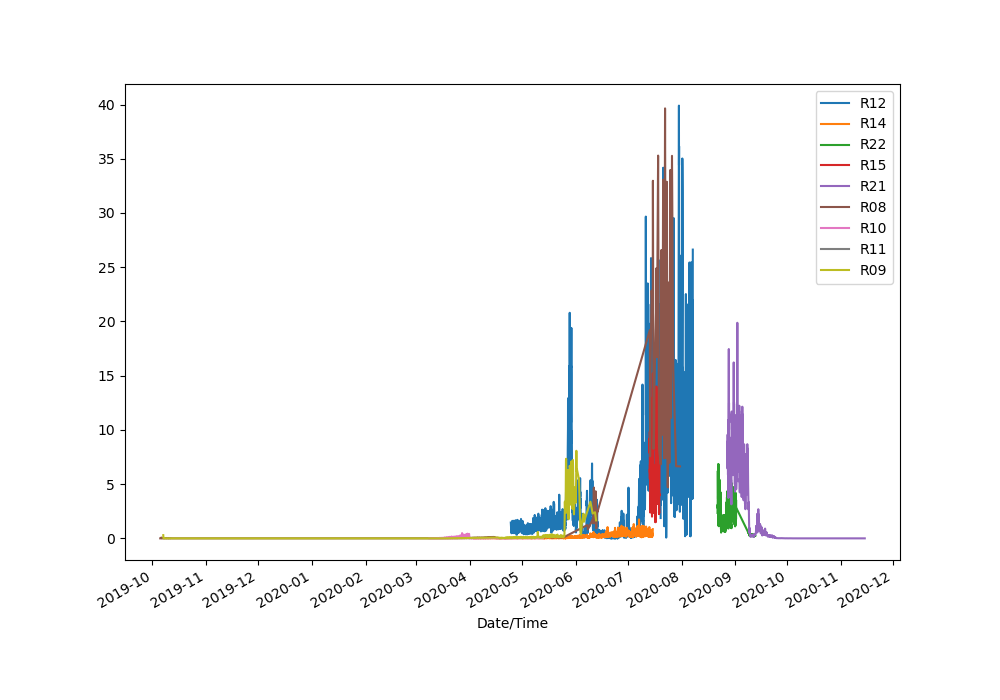

In [12]:
%matplotlib widget

fig = plt.figure(figsize=(10, 7))
ax0 = df0['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R12', color = 'C0')
ax1 = df1['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R14', color = 'C1')
ax2 = df2['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R22', color = 'C2')
ax3 = df3['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R15', color = 'C3')
ax4 = df4['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R21', color = 'C4')
ax5 = df5['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R08', color = 'C5')
ax6 = df6['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R10', color = 'C6')
ax7 = df7['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R11', color = 'C7')
ax8 = df8['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R09', color = 'C8')

ax0.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax5.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax6.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax7.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax8.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# ax0.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax5.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax6.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax7.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax8.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))

plt.gcf().autofmt_xdate()

plt.legend()

(0.0, 2.0)

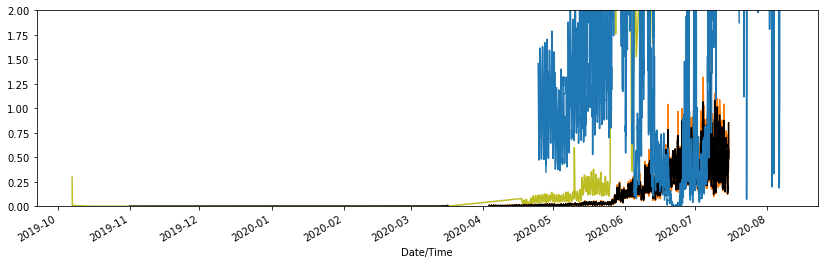

In [160]:
import datetime
fig = plt.figure(figsize=(14, 4))

df8['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R09', color = 'C8')
df8_resampled['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R09', color = 'k')
df1['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R14', color = 'C1')
df1_resampled['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R14', color = 'k')
df0['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R12', color = 'C0')
#df6['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R10', color = 'C6')

plt.ylim(0,2)
#plt.xlim([datetime.date(2020, 1, 1), datetime.date(2020, 4, 30)])


In [35]:
def define_map():
  fig = plt.figure(figsize=(14, 14))
  ax = plt.axes(projection=ccrs.NorthPolarStereo())
  ax.coastlines(resolution='10m');
  #ax.stock_img()
  ax.gridlines(draw_labels=True, dms=True)
  return fig,ax

class Trajectory(object):
  def __init__(self):
    self.read_trajectory()

  def read_trajectory(self, filename):
    ncid = Dataset(filename, "r", format="NETCDF4")
    self.dates = ncid['dates'][:]
    self.longitude, self.latitude = ncid['longitude'][:], ncid['latitude'][:]
    ncid.close()
    
def create_colorbar_ticks(dates):
    # time limits
    dt0, dt1 = datetime.fromordinal(int(dates[0])), datetime.fromordinal(int(dates[-1]))
    monthi, yeari, monthf, yearf = dt0.month, dt0.year, dt1.month, dt1.year
    monthf = monthf+1
    if monthf>12:
        monthf, yearf = 1, yearf + 1
    # create time axis with value at first of each month
    hybridi, hybridf = yeari*100+monthi, yearf*100+monthf
    strmonth= '0'+str(monthi) if monthi>10 else str(monthi)
    ctick=[datetime.strptime(str(yeari) + strmonth, '%Y%m').toordinal()]
    clabel=[strmonth + '/' + str(yeari)]

    while hybridi<hybridf:
        monthi = monthi + 1
        if monthi>12:
            monthi, yeari = 1, yeari+1
        hybridi=yeari*100+monthi
        strmonth= '0'+str(monthi) if monthi<10 else str(monthi)
        ctick.append(datetime.strptime(str(yeari) + strmonth, '%Y%m').toordinal())
        clabel.append(strmonth + '/' + str(yeari))
    return ctick, clabel

In [36]:
#
# load MOSAiC trajectories
#
trajectory = Trajectory(filename_track)

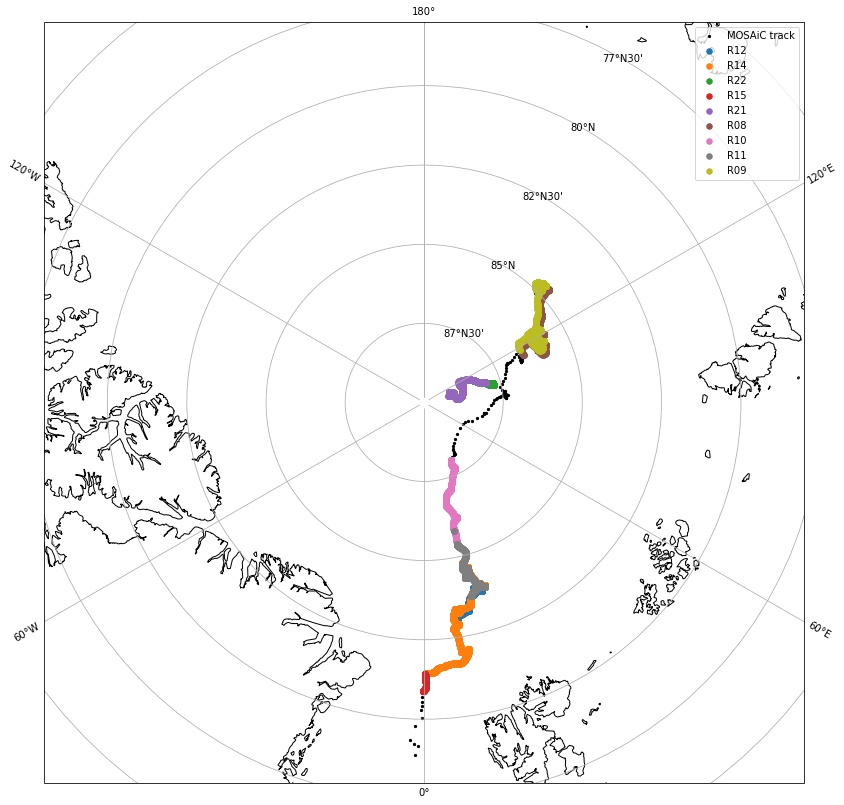

In [37]:
fig,ax = define_map()

plot_extent = [-180, 180, 78, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# topography
#extent_limits = [np.min(topography.longitude), np.max(topography.longitude), np.min(topography.latitude), np.max(topography.latitude)]
#ax.imshow(topography.topography,cmap='Greys_r', extent=extent_limits, transform=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='k', s=5, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
ax.scatter(df0['Longitude (deg)'], df0['Latitude (deg)'], c='C0', s=30, transform=ccrs.PlateCarree(), label='R12')
ax.scatter(df1['Longitude (deg)'], df1['Latitude (deg)'], c='C1', s=30, transform=ccrs.PlateCarree(), label='R14')
ax.scatter(df2['Longitude (deg)'], df2['Latitude (deg)'], c='C2', s=30, transform=ccrs.PlateCarree(), label='R22')
ax.scatter(df3['Longitude (deg)'], df3['Latitude (deg)'], c='C3', s=30, transform=ccrs.PlateCarree(), label='R15')
ax.scatter(df4['Longitude (deg)'], df4['Latitude (deg)'], c='C4', s=30, transform=ccrs.PlateCarree(), label='R21')
ax.scatter(df5['Longitude (deg)'], df5['Latitude (deg)'], c='C5', s=30, transform=ccrs.PlateCarree(), label='R08')
ax.scatter(df6['Longitude (deg)'], df6['Latitude (deg)'], c='C6', s=30, transform=ccrs.PlateCarree(), label='R10')
ax.scatter(df7['Longitude (deg)'], df7['Latitude (deg)'], c='C7', s=30, transform=ccrs.PlateCarree(), label='R11')
ax.scatter(df8['Longitude (deg)'], df8['Latitude (deg)'], c='C8', s=30, transform=ccrs.PlateCarree(), label='R09')

plt.legend()


# measurement point location
#ctick, clabel = create_colorbar_ticks(df.index)
# mplot = ax.scatter(df['Longitude (deg)'], df['Latitude (deg)'], c=df.index, s=200, vmin=ctick[0], vmax=ctick[-1], transform=ccrs.PlateCarree(), cmap='pink_r')
# cbar = fig.colorbar(mplot,extend='both', shrink=0.6,ax=ax, pad=0.1)

# cbar.set_ticks(ctick),cbar.set_ticklabels(clabel),cbar.ax.tick_params(labelsize=16)

#ax.legend()

plt.show()

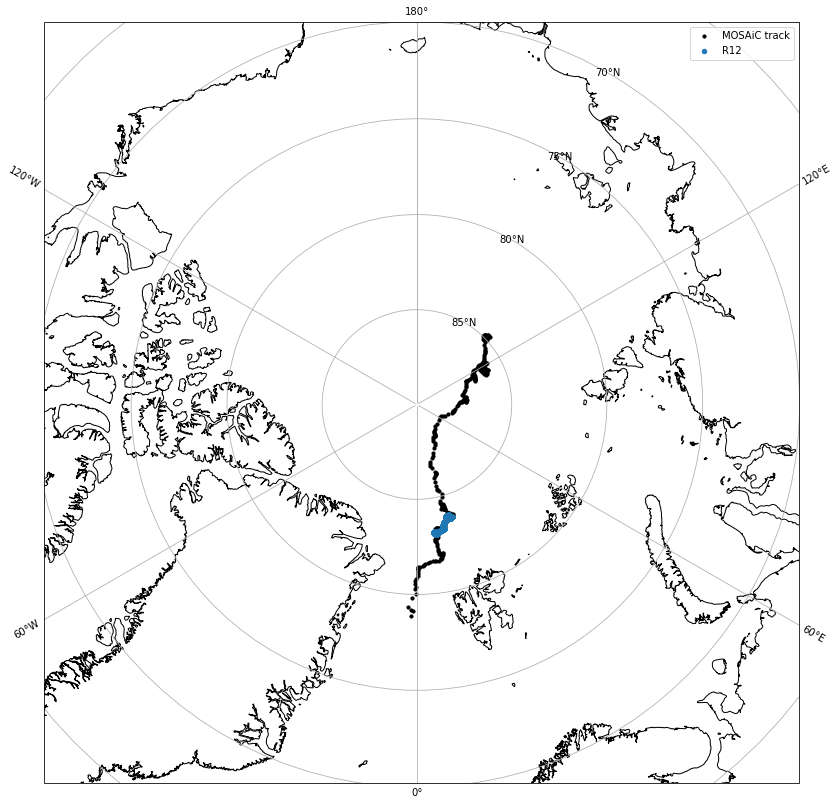

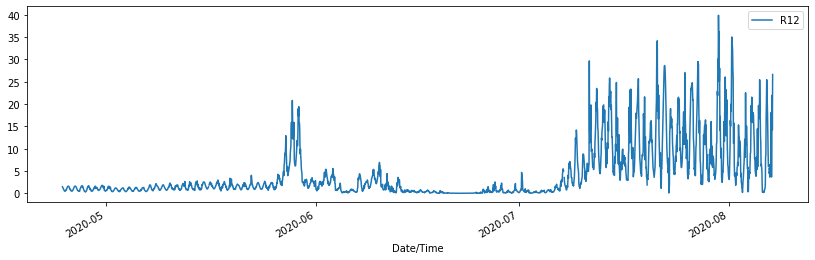

In [38]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='k', s=10, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
ax.scatter(df0['Longitude (deg)'], df0['Latitude (deg)'], c='C0', s=20, transform=ccrs.PlateCarree(), label='R12')

plt.legend()
plt.show()

fig = plt.figure(figsize=(14, 4))
ax0 = df0['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R12', color = 'C0')
ax0.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

# fig = plt.figure(figsize=(5, 5))
# plt.scatter(df0['Longitude (deg)'], df0['Latitude (deg)'], c = df0.index)
# plt.colorbar()

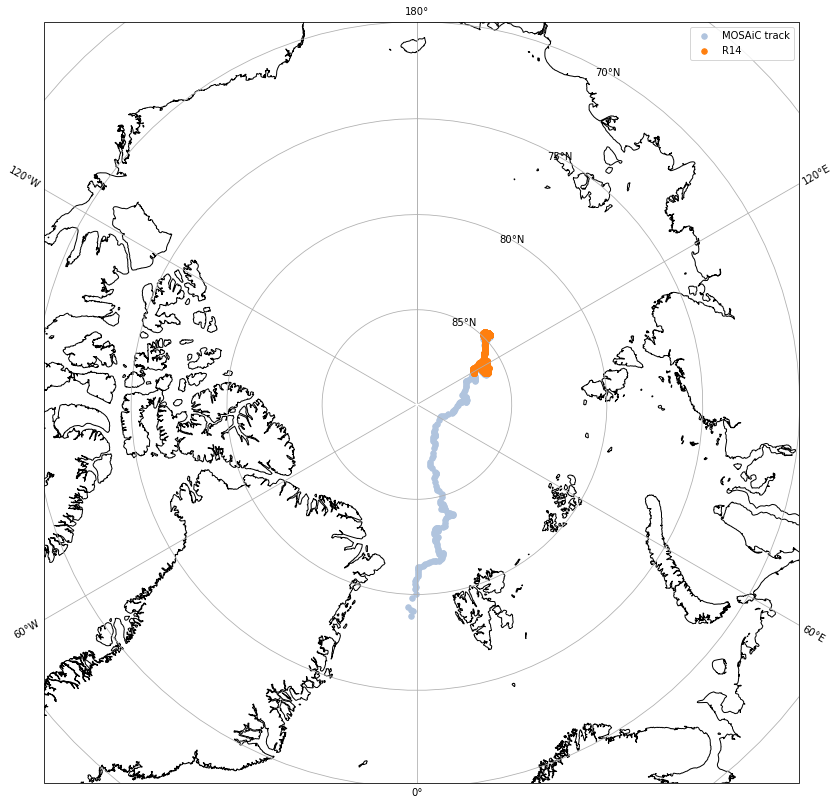

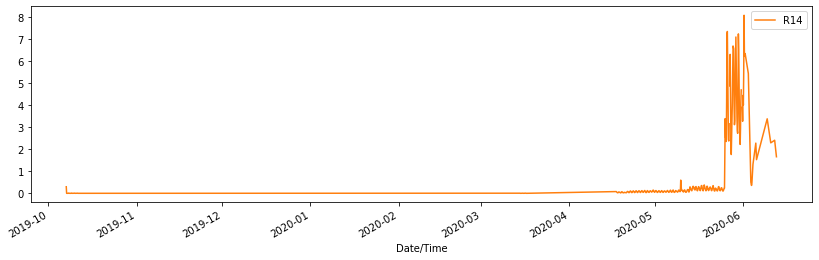

In [16]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
ax.scatter(df1['Longitude (deg)'], df1['Latitude (deg)'], c='C1', s=30, transform=ccrs.PlateCarree(), label='R14')
plt.legend()


fig = plt.figure(figsize=(14, 4))

ax1 = df1['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R14', color = 'C1')

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

plt.legend()
plt.show()

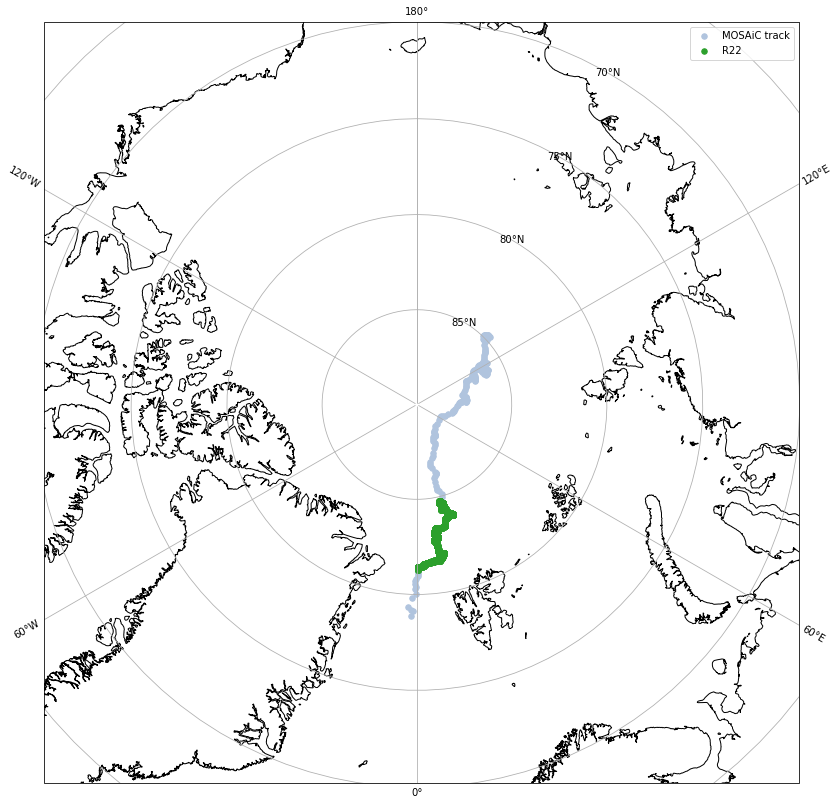

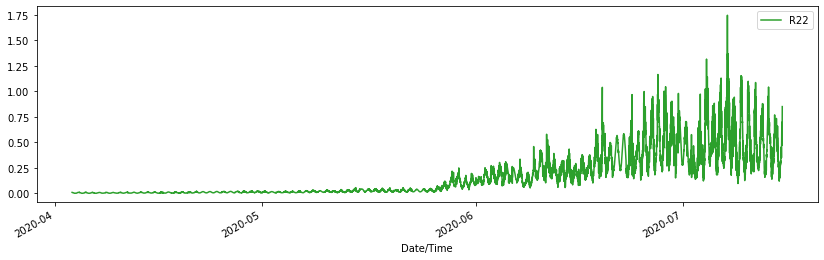

In [17]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
ax.scatter(df2['Longitude (deg)'], df2['Latitude (deg)'], c='C2', s=30, transform=ccrs.PlateCarree(), label='R22')
plt.legend()

fig = plt.figure(figsize=(14, 4))
ax2 = df2['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R22', color = 'C2')

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

plt.legend()
plt.show()

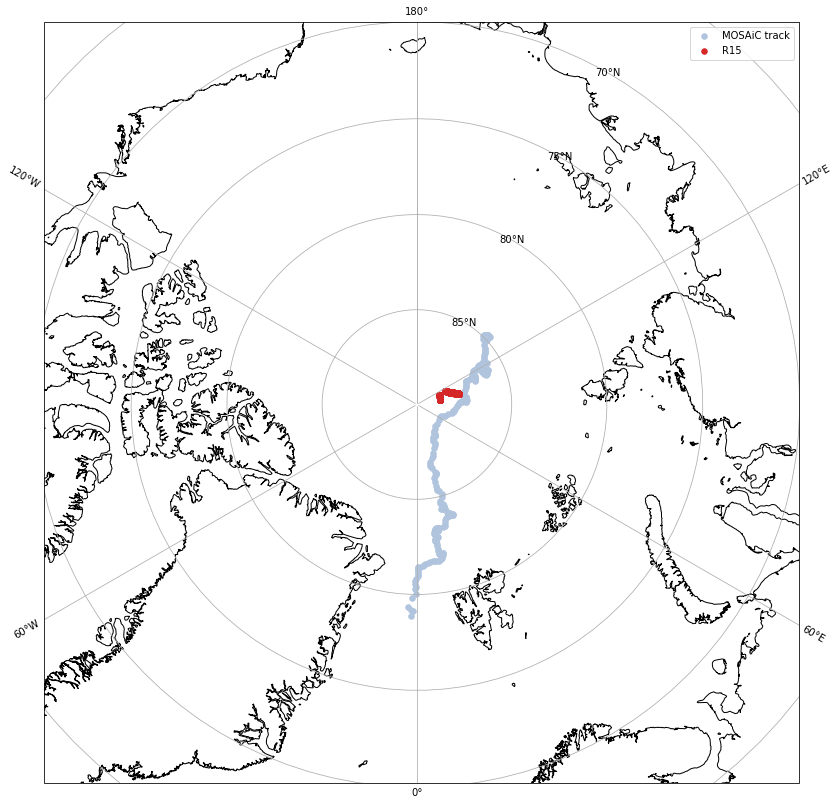

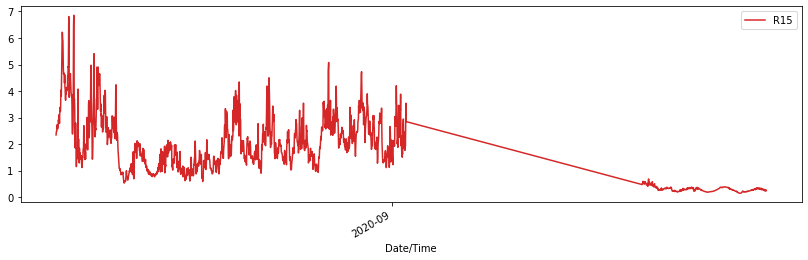

In [18]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
# ax.scatter(df0['Longitude (deg)'], df0['Latitude (deg)'], c='C0', s=30, transform=ccrs.PlateCarree(), label='df0')
# ax.scatter(df1['Longitude (deg)'], df1['Latitude (deg)'], c='C1', s=30, transform=ccrs.PlateCarree(), label='df1')
# ax.scatter(df2['Longitude (deg)'], df2['Latitude (deg)'], c='C2', s=30, transform=ccrs.PlateCarree(), label='df2')
ax.scatter(df3['Longitude (deg)'], df3['Latitude (deg)'], c='C3', s=30, transform=ccrs.PlateCarree(), label='R15')
plt.legend()

fig = plt.figure(figsize=(14, 4))

ax3 = df3['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R15', color = 'C3')

ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

plt.legend()
plt.show()

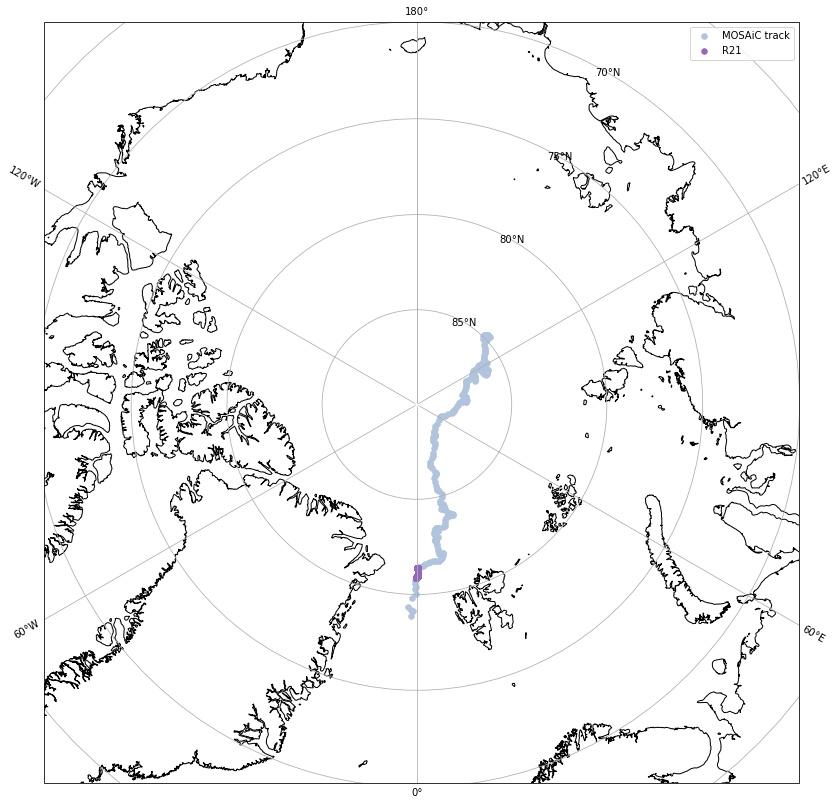

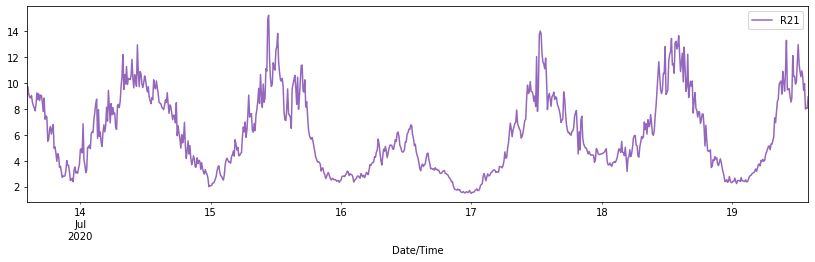

In [19]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
ax.scatter(df4['Longitude (deg)'], df4['Latitude (deg)'], c='C4', s=30, transform=ccrs.PlateCarree(), label='R21')
plt.legend()


fig = plt.figure(figsize=(14, 4))

ax4 = df4['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R21', color = 'C4')

ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

plt.legend()
plt.show()

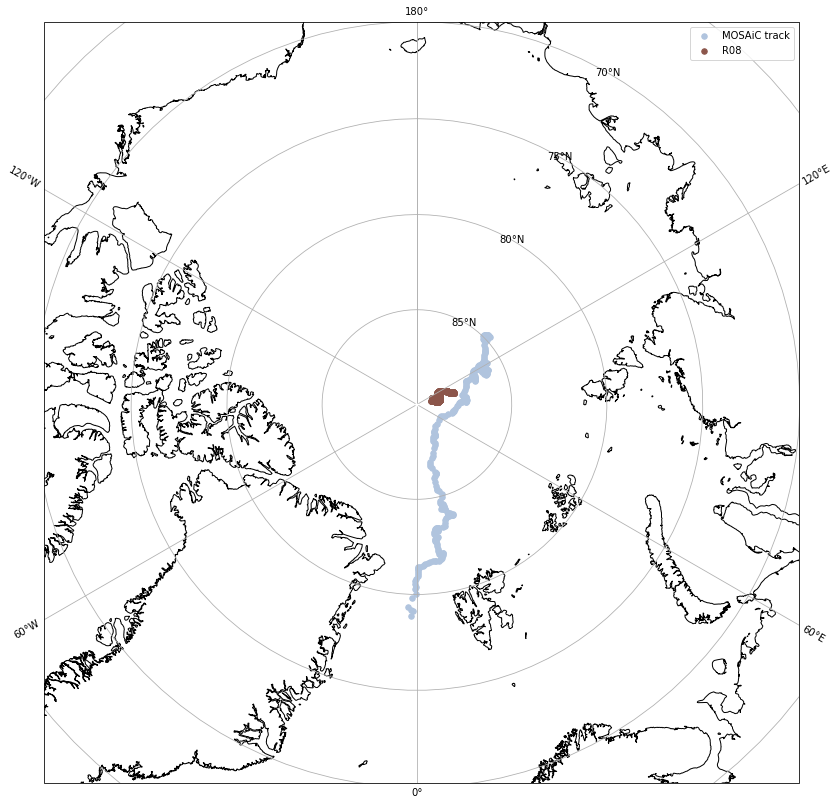

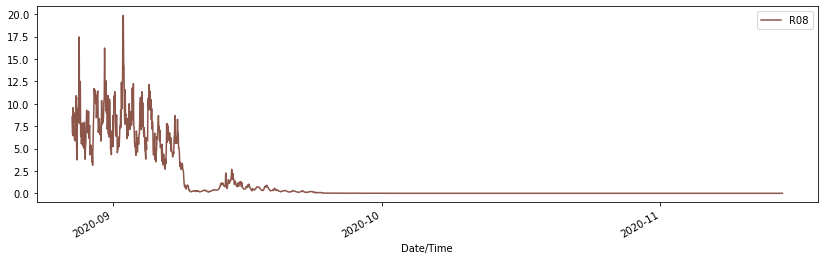

In [20]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
ax.scatter(df5['Longitude (deg)'], df5['Latitude (deg)'], c='C5', s=30, transform=ccrs.PlateCarree(), label='R08')

plt.legend()

fig = plt.figure(figsize=(14, 4))
ax5 = df5['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R08', color = 'C5')

ax5.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

plt.legend()
plt.show()

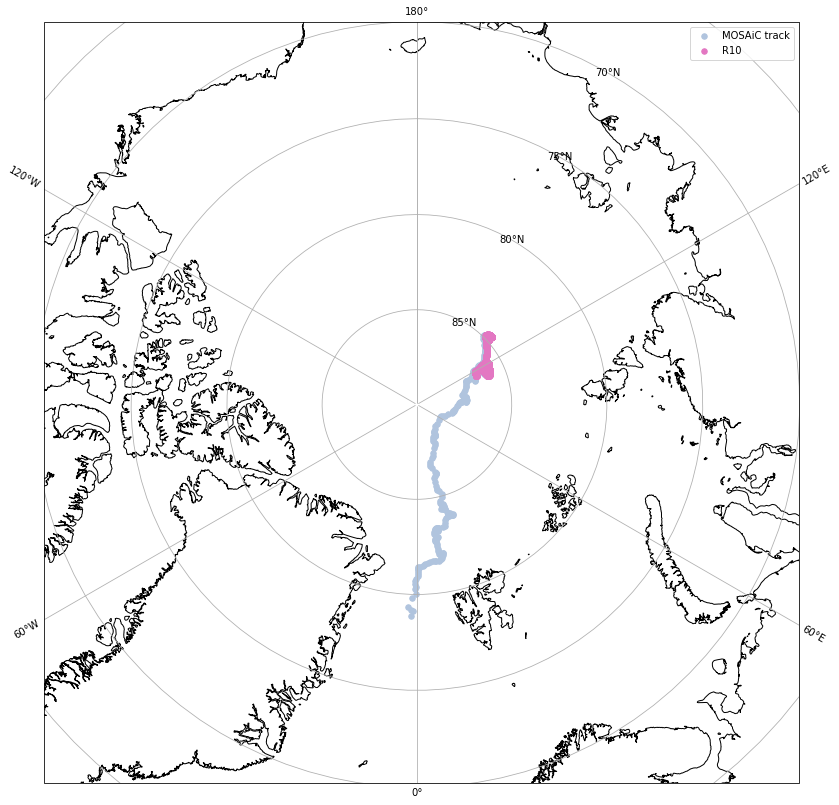

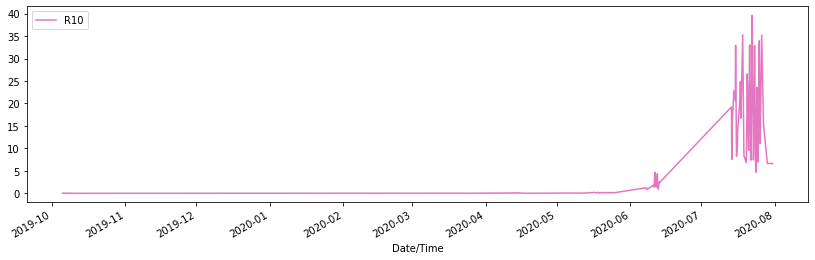

In [21]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks

ax.scatter(df6['Longitude (deg)'], df6['Latitude (deg)'], c='C6', s=30, transform=ccrs.PlateCarree(), label='R10')



plt.legend()
plt.show()

fig = plt.figure(figsize=(14, 4))

ax6 = df6['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R10', color = 'C6')

ax6.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

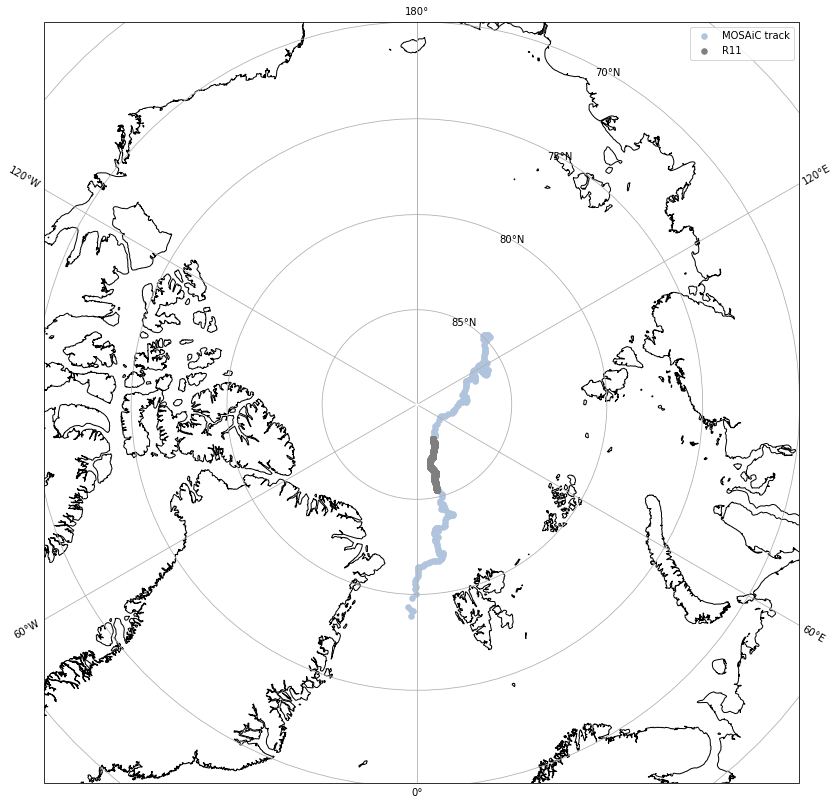

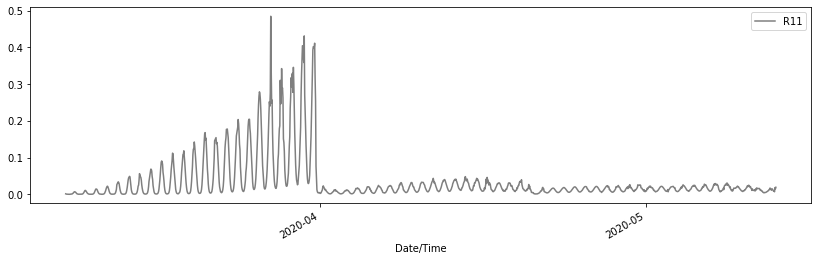

In [22]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks

ax.scatter(df7['Longitude (deg)'], df7['Latitude (deg)'], c='C7', s=30, transform=ccrs.PlateCarree(), label='R11')

plt.legend()
plt.show()

fig = plt.figure(figsize=(14, 4))

ax7 = df7['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R11', color = 'C7')

ax7.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

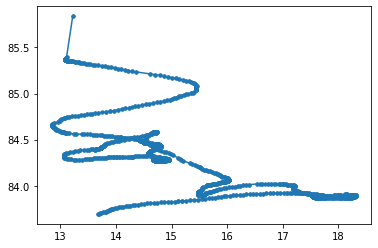

In [ ]:
plt.plot(df8['Longitude (deg)'], df8['Latitude (deg)'],'.-')

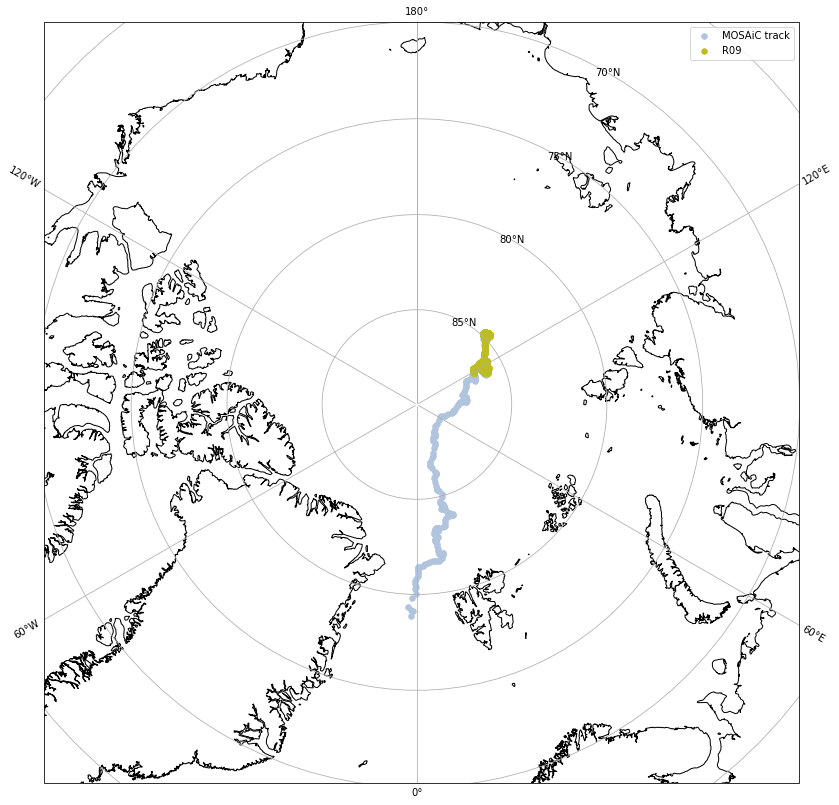

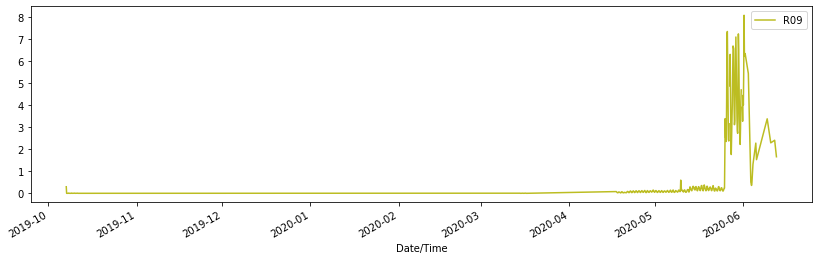

In [39]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
# ax.scatter(df0['Longitude (deg)'], df0['Latitude (deg)'], c='C0', s=30, transform=ccrs.PlateCarree(), label='df0')
# ax.scatter(df1['Longitude (deg)'], df1['Latitude (deg)'], c='C1', s=30, transform=ccrs.PlateCarree(), label='df1')
# ax.scatter(df2['Longitude (deg)'], df2['Latitude (deg)'], c='C2', s=30, transform=ccrs.PlateCarree(), label='df2')
# ax.scatter(df3['Longitude (deg)'], df3['Latitude (deg)'], c='C3', s=30, transform=ccrs.PlateCarree(), label='df3')
# ax.scatter(df4['Longitude (deg)'], df4['Latitude (deg)'], c='C4', s=30, transform=ccrs.PlateCarree(), label='df4')
# ax.scatter(df5['Longitude (deg)'], df5['Latitude (deg)'], c='C5', s=30, transform=ccrs.PlateCarree(), label='df5')
# ax.scatter(df6['Longitude (deg)'], df6['Latitude (deg)'], c='C6', s=30, transform=ccrs.PlateCarree(), label='df6')
# ax.scatter(df7['Longitude (deg)'], df7['Latitude (deg)'], c='C7', s=30, transform=ccrs.PlateCarree(), label='df7')
ax.scatter(df8['Longitude (deg)'], df8['Latitude (deg)'], c='C8', s=30, transform=ccrs.PlateCarree(), label='R09')

plt.legend()
plt.show()

fig = plt.figure(figsize=(14, 4))

ax8 = df8['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R09', color = 'C8')

ax8.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

# Create final dataframe

In [276]:
df1_resampled = df1.resample('30Min').mean()
df1_resampled = df1_resampled.interpolate()

In [277]:
df8_resampled = df8.resample('30Min').mean()
df8_resampled = df8_resampled.interpolate()

In [278]:
df = pd.DataFrame(index = dates, columns = ['PAR'])
dates = pd.date_range('2019-11-1', freq="30Min", periods= 10752)
df['time'] = dates
df.set_index('time', inplace= True)

In [279]:
print(df.dtypes)
for col in df:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df.dtypes)

PAR    object
dtype: object
PAR    float64
dtype: object


In [280]:
df

,PAR
time,
2019-11-01 00:00:00,NaN
2019-11-01 00:30:00,NaN
2019-11-01 01:00:00,NaN
2019-11-01 01:30:00,NaN
2019-11-01 02:00:00,NaN
...,...
2020-06-11 21:30:00,NaN
2020-06-11 22:00:00,NaN
2020-06-11 22:30:00,NaN


In [281]:
df1_resampled = df1_resampled.loc['2020-04-03 11:30:00':'2020-06-11 23:30:00']
df8_resampled = df8_resampled.loc['2019-11-01 00:00:00':'2020-03-16 23:30:00']

In [282]:
df['PAR'].loc['2019-11-01 00:00:00':'2020-03-16 23:30:00'] = df8_resampled['photosythetically active (PAR) irradiance downward (W/m**2)'].loc['2019-11-01 00:00:00':'2020-03-16 23:30:00']
df['PAR'].loc['2020-04-03 11:30:00':'2020-06-11 23:30:00'] = df1_resampled['photosythetically active (PAR) irradiance downward (W/m**2)'].loc['2020-04-03 11:30:00':'2020-06-11 23:30:00']

In [283]:
df_temp = df.loc['2020-03-16'].copy()

df_temp.index = pd.date_range('2020-03-17', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-17'] = df_temp['PAR'].loc['2020-03-17']

df_temp.index = pd.date_range('2020-03-18', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-18'] = df_temp['PAR'].loc['2020-03-18']

df_temp.index = pd.date_range('2020-03-19', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-19'] = df_temp['PAR'].loc['2020-03-19']

df_temp.index = pd.date_range('2020-03-20', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-20'] = df_temp['PAR'].loc['2020-03-20']

df_temp.index = pd.date_range('2020-03-21', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-21'] = df_temp['PAR'].loc['2020-03-21']

df_temp.index = pd.date_range('2020-03-22', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-22'] = df_temp['PAR'].loc['2020-03-22']

df_temp.index = pd.date_range('2020-03-23', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-23'] = df_temp['PAR'].loc['2020-03-23']

df_temp.index = pd.date_range('2020-03-24', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-24'] = df_temp['PAR'].loc['2020-03-24']

df_temp.index = pd.date_range('2020-03-25', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-25'] = df_temp['PAR'].loc['2020-03-25']

df_temp.index = pd.date_range('2020-03-26', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-26'] = df_temp['PAR'].loc['2020-03-26']

df_temp.index = pd.date_range('2020-03-27', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-27'] = df_temp['PAR'].loc['2020-03-27']

df_temp.index = pd.date_range('2020-03-28', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-28'] = df_temp['PAR'].loc['2020-03-28']

df_temp.index = pd.date_range('2020-03-29', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-29'] = df_temp['PAR'].loc['2020-03-29']

df_temp.index = pd.date_range('2020-03-30', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-30'] = df_temp['PAR'].loc['2020-03-30']

df_temp.index = pd.date_range('2020-03-31', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-31'] = df_temp['PAR'].loc['2020-03-31']

df_temp.index = pd.date_range('2020-04-01', freq="30Min", periods= 48)
df['PAR'].loc['2020-04-01'] = df_temp['PAR'].loc['2020-04-01']

df_temp.index = pd.date_range('2020-04-02', freq="30Min", periods= 48)
df['PAR'].loc['2020-04-02'] = df_temp['PAR'].loc['2020-04-02']

<AxesSubplot:xlabel='time'>

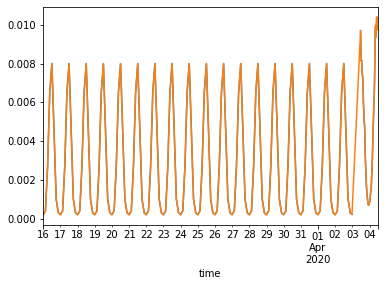

In [285]:
df['PAR'].loc['2020-03-15 23:30:00':'2020-04-04 11:30:00'].plot()
df_interp = df.interpolate()
df_interp['PAR'].loc['2020-03-15 23:30:00':'2020-04-04 11:30:00'].plot()

In [286]:
df_interp.to_csv(filename_output)